In [1]:
import constants
cache_folder_name = 'ratio=logreg;loss=squared;method=pymanopt_UB_fast_no_ws_no_c_lsqr'
seed = 44

In [2]:
import autograd.numpy as np
np.random.seed(seed)
import python_utils.python_utils.basic as basic
import python_utils.python_utils.caching as caching
log_folder = '%s/%s' % (constants.cache_folder, cache_folder_name)
caching.init(constants.cache_folder, constants.which_hash, basic.archiver(log_folder))
%load_ext autoreload
%autoreload 2
import matplotlib
matplotlib.use('Agg')

[Errno 17] File exists: '/mnt/nfs6/fultonw/projects/runs/domain_adapt_run/domain_adapt_run/notebooks/new/hyperparameter_loss_surface_stratified/CA_housing/cache/ratio=logreg;loss=squared;method=pymanopt_UB_fast_no_ws_no_c_lsqr'


In [3]:
import matplotlib.pyplot as plt
from IPython.display import display_pretty, display_html
import python_utils.python_utils.basic as basic
import pandas as pd
import pdb
import itertools
import functools
import scipy.stats
import scipy
import cvxopt
import autograd
import autograd.numpy as np
import domain_adapt.domain_adapt.new.fxns as fxns
import domain_adapt.domain_adapt.new.utils as utils
import domain_adapt.domain_adapt.new.optimizers as optimizers
import domain_adapt.domain_adapt.new.constructors as constructors
#import domain_adapt.domain_adapt.SDR_data as data
import domain_adapt_run.domain_adapt_run.notebooks.new.hyperparameter_loss_surface_stratified.run as run
import data.domain_adapt_data.domain_adapt_data.fxns as data

In [4]:
# define data
training_proportion = 0.9
training_sampler = functools.partial(data.kmm_paper_pca_subsample, 10., 5., 0.1)
get_data_f = data.CA_housing
num_data = 900

In [5]:
#
get_data = functools.partial(data.get_data_helper, training_proportion, training_sampler, get_data_f, num_data)

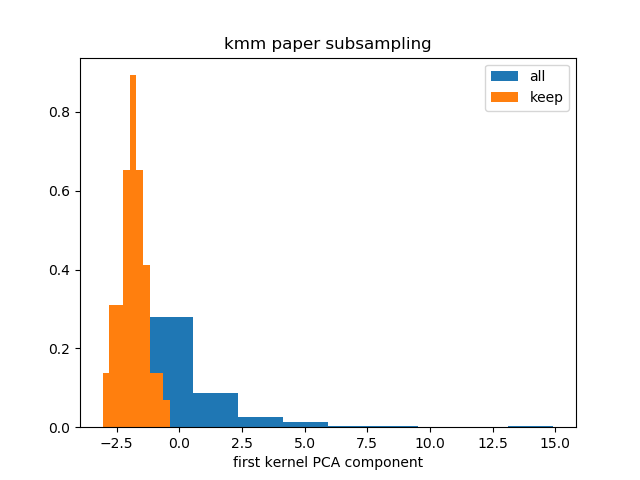

xs_train shape: (108, 9) xs_test_shape (108,)


In [6]:
# test get_data
xs_train, ys_train, xs_test, ys_test = get_data(1)
print 'xs_train shape:', xs_train.shape, 'xs_test_shape', xs_test.shape

In [7]:
# define fitter
import pymanopt.solvers
pymanopt_options={'logverbosity':2, 'maxiter':25}#, 'linesearch':pymanopt.solvers.linesearch.LineSearchBackTracking(maxiter=2, initial_stepsize=1)}
cvx_opt_warm_start = True
cvx_opt_scipy_minimize_options = {'maxiter':1000, 'disp':False}
#cvx_opt_scipy_minimize_method = 'cg'
#cvx_opt_scipy_minimize_method = 'BFGS' 
cvx_opt_scipy_minimize_method = 'L-BFGS-B'
#cvx_opt_scipy_minimize_verbose = 1000
cvx_opt_scipy_minimize_verbose = False
unconstrained = False
unconstrained_scipy_minimize_options = {'maxiter':100}
unconstrained_scipy_minimize_method = 'cg'
unconstrained_scipy_minimize_verbose = 1
linesearch_method = 'brent'
linesearch_options = {'maxiter':10}
linesearch_init_window_width = 1000
plot_b_info = constructors.plot_b_info
#unconstrained = True
num_tries = 2
def get_fitter(c_logreg, weight_reg, sigma, max_ratio, u_dim, c_lsqr_loss=0., c_lsqr_loss_eval=0., UB_reg=0.):
    if unconstrained:
        B_init_f_getter = lambda xs_train, ys_train, xs_test: (lambda: np.random.normal(size=xs_train.shape[1]))
    else:
        B_init_f_getter = lambda xs_train, ys_train, xs_test: (lambda: np.random.normal(size=(xs_train.shape[1],u_dim)))
    return constructors.no_c_lsqr_no_ws_logreg_ratio_UB_fitter(c_logreg=c_logreg, weight_reg=weight_reg, sigma=sigma, B_init_f_getter=B_init_f_getter, unconstrained=unconstrained, c_lsqr_loss=c_lsqr_loss, c_lsqr_loss_eval=c_lsqr_loss_eval, UB_reg=UB_reg, max_ratio=max_ratio, num_tries=num_tries, pymanopt_options=pymanopt_options, cvx_opt_warm_start=cvx_opt_warm_start, cvx_opt_scipy_minimize_method=cvx_opt_scipy_minimize_method, cvx_opt_scipy_minimize_verbose=cvx_opt_scipy_minimize_verbose, cvx_opt_scipy_minimize_options=cvx_opt_scipy_minimize_options, unconstrained_scipy_minimize_method=unconstrained_scipy_minimize_method, unconstrained_scipy_minimize_verbose=unconstrained_scipy_minimize_verbose, unconstrained_scipy_minimize_options=unconstrained_scipy_minimize_options, linesearch_method=linesearch_method, linesearch_options=linesearch_options, linesearch_init_window_width=linesearch_init_window_width, plot_b_info=plot_b_info)

In [8]:
# define hyperparameter search space via an iterator
#UB_regs = [0.]#1,1.,10.]
#u_dims = [3,]
u_dims = [1,]
#c_lsqr_losses = [0.]
#c_lsqr_loss_evals = [0.]
#c_lsqrs = [.01,.1,1.,10.]
c_logregs = [0.1,1.,10.]
#weight_regs = [0.1,.5,1.,5.]
#weight_regs = [0.01,.5,1.,5.]
weight_regs = [5.]
sigmas = [0.25,1.,5.]#,5.]
max_ratios = [5.]
make_tuple = lambda key, vals: [(key,val) for val in vals]
care_hyperparam_tuples = itertools.product(
#    make_tuple('UB_reg',UB_regs), 
    make_tuple('u_dim',u_dims), 
    )
nocare_hyperparam_tuples = itertools.product(
#    make_tuple('c_lsqr_loss',c_lsqr_losses), 
#    make_tuple('c_lsqr_loss_eval',c_lsqr_loss_evals), 
#    make_tuple('c_lsqr',c_lsqrs), 
    make_tuple('c_logreg',c_logregs), 
    make_tuple('weight_reg',weight_regs), 
#    make_tuple('UB_reg',UB_regs), 
    make_tuple('sigma',sigmas), 
    make_tuple('max_ratio',max_ratios)
    )

In [9]:
# define mapper
mapper = map

In [10]:
#
num_iterations = 1

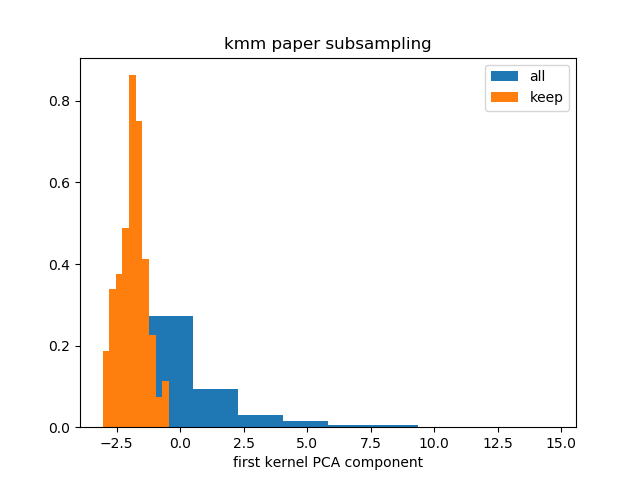

try 0
(1.0, 1.0, array([[-0.46744101],
       [-0.86015338],
       [ 0.85910419],
       [-0.80962658],
       [ 0.87331184],
       [ 1.19973618],
       [ 0.45615304],
       [-0.35757903],
       [ 0.04108223]]))
(1.0, 1.0, array([[-0.46744101],
       [-0.86015338],
       [ 0.85910419],
       [-0.80962658],
       [ 0.87331184],
       [ 1.19973618],
       [ 0.45615304],
       [-0.35757903],
       [ 0.04108223]]))
     fun: 1.5875625680872547
    nfev: 11
     nit: 10
 success: False
       x: 0.0
[1.5875625680872547, 1.5879035377980186, 1.5892593903111614, 1.5912328082609166, 1.593570930764028, 1.5961103715013354, 1.5987445276858447, 1.6014035656053196, 1.6040418562784531, 1.6066299162134805]
Optimizing...
 iter		   cost val	    grad. norm
weight_reg 1.24034196047
weight_reg 1.24034196047
weight_reg 1.24034196047
weight_reg 1.24034196047
weight_reg 1.24034196047
weight_reg Autograd FloatNode with value 1.24034196047 and 1 tape(s)
weight_reg 1.24034196047
weight_reg 1.2403419

KeyboardInterrupt: 

In [11]:
# 
run.run(get_data, get_fitter, care_hyperparam_tuples, nocare_hyperparam_tuples, num_iterations, mapper)